<a href="https://colab.research.google.com/github/Beebruna/Treinamento_Data_Science/blob/main/Modelos_do_artigo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.neighbors import (NeighborhoodComponentsAnalysis, KNeighborsClassifier)

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
from sklearn.preprocessing import Normalizer, MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer, LabelEncoder

In [ ]:
## Libs
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import re

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, max_error, mean_squared_error
from sklearn.preprocessing import StandardScaler  

import warnings
warnings.filterwarnings('ignore')

#KNN
from sklearn.neighbors import KNeighborsClassifier

#Linear Model
from sklearn import linear_model

#NaiveBayesClassifiers
from sklearn.naive_bayes import GaussianNB

#Decicion Tree
from sklearn import tree

#Random Forest
from sklearn.ensemble import RandomForestClassifier

#Support Vector Machine
from sklearn import svm

#AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering

#DBS SCAN
from sklearn.cluster import DBSCAN

#K-MEANS
from sklearn.cluster import KMeans

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

def erros(y_test, y_pred):
    mape = mean_absolute_percentage_error(y_test, y_pred)
    print(f"MAPE: {mape*100:.5f}%")
    
    mse = mean_squared_error(y_test, y_pred)
    print(f"MSE: {mse:.2f}")

In [ ]:
features, label = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(features, label, stratify=label, train_size=0.5, random_state=42)

In [ ]:
vet_accuracy = []

#**Aprendizado Supervisionado**


#K-Nearest Neighbors

In [ ]:
nca = NeighborhoodComponentsAnalysis(random_state=42)
knn = KNeighborsClassifier(n_neighbors=3)

In [ ]:
nca_pipe = Pipeline([('nca', nca), ('knn', knn)])
nca_pipe.fit(X_train, y_train)
print(nca_pipe.score(X_test, y_test))

0.9466666666666667


In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn_scores = knn.fit(X_train, y_train)

vet_accuracy.append(f'KNeighborsClassifier: {(knn.score(X_test, y_test) * 100):.2f}%')
print(vet_accuracy[-1])

KNeighborsClassifier: 92.00%


#Linear Model

In [ ]:
reg = linear_model.Lasso()
reg.fit(X_train, y_train)
reg_pred = reg.predict(X_test)

vet_accuracy.append(f'Linear Model erro médio quadrado: {(mean_squared_error(y_test, reg_pred) * 100):.2f}%')
print(vet_accuracy[-1])

Linear Model erro médio quadrado: 38.29%


#Naive Bayes classifiers

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

predict_features = gnb.predict(X_test)
total_data = X_test.shape[0]
incorrects = (y_test != predict_features).sum()
accuracy = (total_data - incorrects) / total_data

print("Número de pontos rotulados incorretamente de um total %d pontos : %d" % (total_data, incorrects))
print("Taxa de acerto : %f" % (accuracy))
vet_accuracy.append(f'Gaussian Naive Bayes Acurácia: {((accuracy) * 100):.2f}%')
print(vet_accuracy[-1])

Número de pontos rotulados incorretamente de um total 75 pontos : 4
Taxa de acerto : 0.946667
Gaussian Naive Bayes Acurácia: 94.67%


#Decision Tree

Decision Trees Acurácia: 88.00%


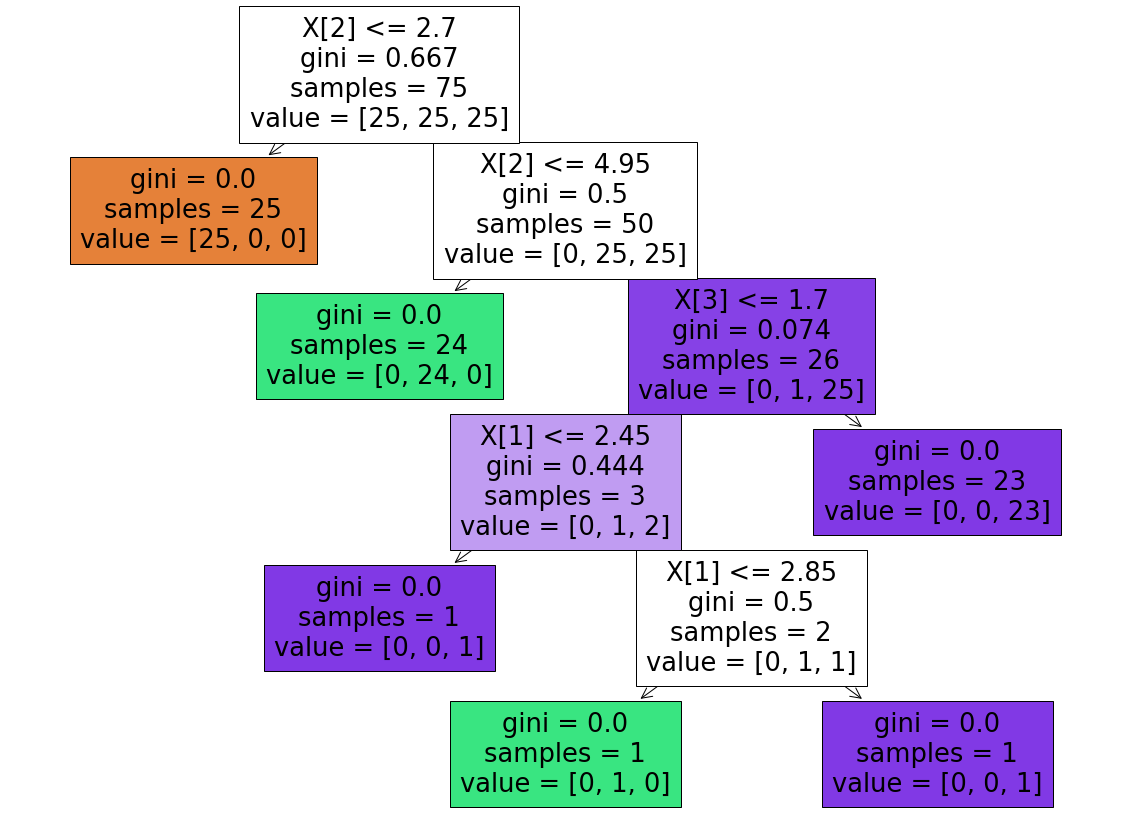

In [ ]:
dtree = tree.DecisionTreeClassifier()
dtree_pred = dtree.fit(X_train, y_train).predict(X_test)
print('Decision Trees Acurácia: {:.2f}%'.format(accuracy_score(y_test, dtree_pred) * 100))

fig = plt.figure(figsize=(20,15))
_ = tree.plot_tree(dtree, 
                #    feature_names=iris.feature_names,  
                #    class_names=iris.target_names,
                   filled=True)

vet_accuracy.append(f'Decision Trees Acurácia: {(accuracy_score(y_test, dtree_pred) * 100):.2f}%')

#Random Forest

In [ ]:
rfc = RandomForestClassifier(n_estimators=1000)
rfc_pred = rfc.fit(X_train, y_train).predict(X_test)
print('Random Forest Acurácia: {:.2f}%'.format(accuracy_score(y_test, rfc_pred) * 100))
vet_accuracy.append('Random Forest Acurácia: {:.2f}%'.format(accuracy_score(y_test, rfc_pred) * 100))

Random Forest Acurácia: 89.33%


#SVM

In [ ]:
dsvm = svm.SVC()
dsvm_pred = dsvm.fit(X_train, y_train).predict(X_test)
print('SVM Acurácia: {:.2f}%'.format(accuracy_score(y_test, dsvm_pred) * 100))
vet_accuracy.append('SVM Acurácia: {:.2f}%'.format(accuracy_score(y_test, dsvm_pred) * 100))

SVM Acurácia: 97.33%


#**APRENDIZADO NÂO SUPERVISIONADO**

#Auto Encoder vs PCA - Knn

In [ ]:
import keras
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint
from keras import regularizers
from keras.optimizers import Adam
from keras import regularizers
from sklearn import datasets
from sklearn import decomposition
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics

%matplotlib inline

RANDOM_SEED = 37117
np.random.seed(RANDOM_SEED)

In [ ]:
X, y = load_iris(return_X_y=True)

In [ ]:
input_dim = X.shape[1]
encoding_dim = 2  
input_img = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='linear')(input_img)
decoded = Dense(input_dim, activation='linear')(encoded)
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')
# print(autoencoder.summary())

history = autoencoder.fit(X, X,
                epochs=1000,
                batch_size=16,
                shuffle=True,
                validation_split=0.1,
                verbose = 0)

encoder = Model(input_img, encoded)
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))
X_new_encoder = encoder.predict(X)

5/5 [==============================] - 0s 2ms/step


In [ ]:
from sklearn.decomposition import PCA

pca=PCA(n_components=3)
X_new_PCA = pca.fit_transform(X)
# pca = decomposition.PCA()
# X_new_PCA = pca.fit_transform(X)

In [ ]:
X_train_encoder, X_test_encoder, y_train_encoder, y_test_encoder = train_test_split(X_new_encoder, y, test_size = 0.3, random_state=20, stratify=y)

In [ ]:
X_train_PCA, X_test_PCA, y_train_PCA, y_test_PCA = train_test_split(X_new_PCA, y, test_size = 0.3, random_state=20, stratify=y)

In [ ]:
knn_pca = KNeighborsClassifier(7)
knn_pca.fit(X_train_PCA,y_train_PCA)
print("Test score after PCA",knn_pca.score(X_test_PCA,y_test_PCA),"%")
vet_accuracy.append(f'Knn com PCA: {(knn_pca.score(X_test_PCA,y_test_PCA) * 100):.2f}%')

knn_encoder = KNeighborsClassifier(7)
knn_encoder.fit(X_train_encoder,y_train_encoder)
vet_accuracy.append(f'Knn com Encoder: {(knn_encoder.score(X_test_encoder,y_test_encoder) * 100):.2f}%')


Test score after PCA 0.9777777777777777 %


In [ ]:
vet_accuracy

['KNeighborsClassifier: 92.00%',
 'Linear Model erro médio quadrado: 38.29%',
 'Gaussian Naive Bayes Acurácia: 94.67%',
 'Decision Trees Acurácia: 88.00%',
 'Random Forest Acurácia: 89.33%',
 'SVM Acurácia: 97.33%',
 'Knn com PCA: 97.78%',
 'Knn com Encoder: 91.11%']

#K-Mean Clustering

In [ ]:
X_features, Y_features = load_iris(return_X_y=True)

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0, algorithm="elkan")
kmeans.fit(X_features)

KMeans(algorithm='elkan', n_clusters=3, random_state=0)

In [ ]:
y_kmeans = kmeans.labels_
vet_accuracy.append('K-mean clustering: {:.2f}%'.format(accuracy_score(Y_features, y_kmeans) * 100))
print(vet_accuracy[-1])

K-mean clustering: 24.00%


#Agglomerative Clustering

In [ ]:
clustering = AgglomerativeClustering(n_clusters = 3)
clustering.fit(X_features)

AgglomerativeClustering(n_clusters=3)

In [ ]:
vet_accuracy.append('Agglomerative Clustering: {:.2f}%'.format(accuracy_score(Y_features, clustering.labels_) * 100))

#DBS - SCAN

In [ ]:
clustering = DBSCAN(min_samples=10, algorithm='auto')
clustering.fit(X_features)

DBSCAN(min_samples=10)

In [ ]:
vet_accuracy.append('DBS-SCAN: {:.2f}%'.format(accuracy_score(Y_features, clustering.labels_) * 100))

In [ ]:
vet_accuracy

['KNeighborsClassifier: 92.00%',
 'Linear Model erro médio quadrado: 38.29%',
 'Gaussian Naive Bayes Acurácia: 94.67%',
 'Decision Trees Acurácia: 88.00%',
 'Random Forest Acurácia: 89.33%',
 'SVM Acurácia: 97.33%',
 'Knn com PCA: 97.78%',
 'Knn com Encoder: 91.11%',
 'K-mean clustering: 24.00%',
 'Agglomerative Clustering: 23.33%',
 'DBS-SCAN: 61.33%']

#**APRENDIZAGEM PROFUNDA**

#NLP

In [ ]:
pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from nltk.tokenize import word_tokenize

In [ ]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
sagan_quote = """ If you wish to make an apple pie from scratch, you must first invent the universe."""

In [ ]:
words_in_sagan_quote = word_tokenize(sagan_quote)

In [ ]:
nltk.pos_tag(words_in_sagan_quote)
[('If', 'IN'),
 ('you', 'PRP'),
 ('wish', 'VBP'),
 ('to', 'TO'),
 ('make', 'VB'),
 ('an', 'DT'),
 ('apple', 'NN'),
 ('pie', 'NN'),
 ('from', 'IN'),
 ('scratch', 'NN'),
 (',', ','),
 ('you', 'PRP'),
 ('must', 'MD'),
 ('first', 'VB'),
 ('invent', 'VB'),
 ('the', 'DT'),
 ('universe', 'NN'),
 ('.', '.')]

[('If', 'IN'),
 ('you', 'PRP'),
 ('wish', 'VBP'),
 ('to', 'TO'),
 ('make', 'VB'),
 ('an', 'DT'),
 ('apple', 'NN'),
 ('pie', 'NN'),
 ('from', 'IN'),
 ('scratch', 'NN'),
 (',', ','),
 ('you', 'PRP'),
 ('must', 'MD'),
 ('first', 'VB'),
 ('invent', 'VB'),
 ('the', 'DT'),
 ('universe', 'NN'),
 ('.', '.')]

In [ ]:
nltk.download('tagsets')
nltk.help.upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


#MultLayer Perceptron

In [ ]:
features, label = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(features, label, stratify=label, train_size=0.5, random_state=42)

In [ ]:
mlp = MLPClassifier(
   activation='relu',
   solver='adam',
   random_state= 42,
   max_iter= 120,
   alpha=0.01,
   early_stopping=False,
   warm_start=False, 
   # verbose=True,
   )

In [ ]:
mlp.fit(X_train, y_train)

predicted = mlp.predict(X_test)
predict_prob = mlp.predict_proba(X_test)[:, 1]
print('MLP Conjunto de teste score: {:.2f}%'.format(mlp.score(X_test, y_test) * 100))
vet_accuracy.append(f'MLP Conjunto de teste score: {(mlp.score(X_test, y_test) * 100):.2f}%')

MLP Conjunto de teste score: 97.33%


#**Resultados**

In [ ]:
vet_accuracy

['KNeighborsClassifier: 92.00%',
 'Linear Model erro médio quadrado: 38.29%',
 'Gaussian Naive Bayes Acurácia: 94.67%',
 'Decision Trees Acurácia: 88.00%',
 'Random Forest Acurácia: 89.33%',
 'SVM Acurácia: 97.33%',
 'Knn com PCA: 97.78%',
 'Knn com Encoder: 91.11%',
 'K-mean clustering: 24.00%',
 'Agglomerative Clustering: 23.33%',
 'DBS-SCAN: 61.33%',
 'MLP Conjunto de teste score: 97.33%']

#Auto Encoder vs PCA - K-means ----------- BONUS

In [ ]:
import keras
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint
from keras import regularizers
from keras.optimizers import Adam
from keras import regularizers
from sklearn import datasets
from sklearn import decomposition
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics

%matplotlib inline

RANDOM_SEED = 37117
np.random.seed(RANDOM_SEED)

In [ ]:
X, y = load_iris(return_X_y=True)
#iris = datasets.load_iris()
# X = iris.data
# y = iris.target
# target_names = iris.target_names

scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [ ]:
pca = decomposition.PCA()
pca_transformed = pca.fit_transform(X_scaled)
#plot3clusters(pca_transformed[:,:2], 'PCA', 'PC')  

In [ ]:
#create an AE and fit it with our data using 3 neurons in the dense layer using keras' functional API
input_dim = X_scaled.shape[1]
encoding_dim = 2  
input_img = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='linear')(input_img)
decoded = Dense(input_dim, activation='linear')(encoded)
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')
print(autoencoder.summary())

history = autoencoder.fit(X_scaled, X_scaled,
                epochs=1000,
                batch_size=16,
                shuffle=True,
                validation_split=0.1,
                verbose = 0)

#plot our loss 
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('model train vs validation loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train', 'validation'], loc='upper right')
# plt.show()

# use our encoded layer to encode the training input
encoder = Model(input_img, encoded)
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))
X_new_encoder = encoder.predict(X_scaled)
# plot3clusters(encoded_data[:,:2], 'Linear AE', 'AE')  

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense_2 (Dense)             (None, 2)                 10        
                                                                 
 dense_3 (Dense)             (None, 4)                 12        
                                                                 
Total params: 22
Trainable params: 22
Non-trainable params: 0
_________________________________________________________________
None
5/5 [==============================] - 0s 3ms/step


In [ ]:
X_new_PCA =pca.fit_transform(X_scaled)


In [ ]:
labels_true = y 
titles = ['PCA', 'Linear AE']
for n_clusters_ in [2]:
  estimators = [('PCA'    , KMeans(n_clusters=n_clusters_), X_new_PCA),
                ('AE linear' , KMeans(n_clusters=n_clusters_), X_new_encoder)]

  print(type(y))
  for name, est, data in estimators:
      X = data
      est.fit(X)
      labels = est.labels_
      # print(name,':')
      print(labels[:])
      
      print(f'kmeans com {name}: {(accuracy_score(y, labels[:]) * 100):.2f}%')

<class 'numpy.ndarray'>
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
kmeans com PCA: 0.00%
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
kmeans com AE linear: 66.67%


In [ ]:
vet_accuracy

['KNeighborsClassifier: 92.00%',
 'Linear Model erro médio quadrado: 38.29%',
 'Gaussian Naive Bayes Acurácia: 94.67%',
 'Decision Trees Acurácia: 88.00%',
 'Random Forest Acurácia: 89.33%',
 'SVM Acurácia: 97.33%',
 'Knn com PCA: 97.78%',
 'Knn com Encoder: 91.11%',
 'K-mean clustering: 24.00%',
 'Agglomerative Clustering: 23.33%',
 'DBS-SCAN: 61.33%',
 'MLP Conjunto de teste score: 97.33%']